In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

### 1. Carregamento de dados

In [2]:
demo = pd.read_sas('https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.xpt')
bmi = pd.read_sas('https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BMX_L.xpt')
bp = pd.read_sas('https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.xpt')

### 2. Merge dos dados

In [3]:
data = pd.merge(demo[['SEQN', 'RIDAGEYR']], bmi[['SEQN', 'BMXBMI']], on='SEQN')
data = pd.merge(data, bp[['SEQN', 'BPXOSY1']], on='SEQN')

### 3. Filtragem dos dados

In [4]:
data = data[(data['RIDAGEYR'] >= 20) & (data['RIDAGEYR'] <= 60)]
data = data.dropna(subset=['BMXBMI', 'BPXOSY1'])

print("Primeiras linhas do dataset após filtragem:")
data.head()

Primeiras linhas do dataset após filtragem:


,SEQN,RIDAGEYR,BMXBMI,BPXOSY1
0,130378.0,43.0,27.0,135.0
2,130380.0,44.0,29.7,111.0
3,130386.0,34.0,30.2,110.0
5,130388.0,27.0,43.7,130.0
6,130389.0,59.0,28.0,145.0


### 4. Análise exploratória

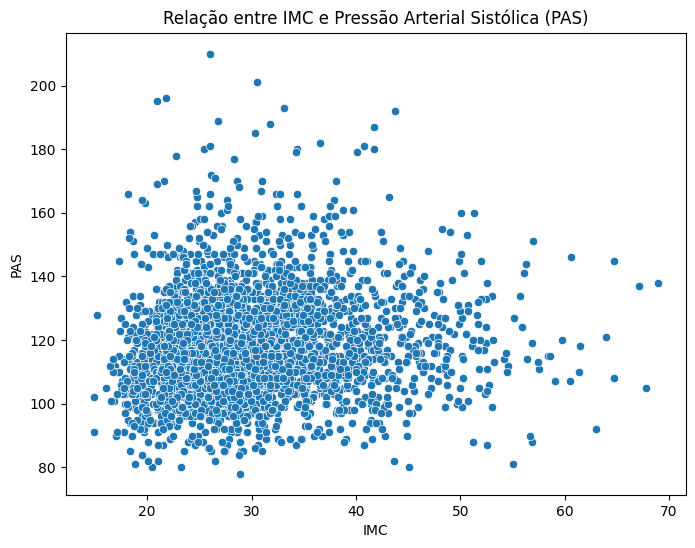

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMXBMI', y='BPXOSY1', data=data)
plt.title('Relação entre IMC e Pressão Arterial Sistólica (PAS)')
plt.xlabel('IMC')
plt.ylabel('PAS')
plt.show()

### 5. Estimativa do modelo

In [6]:
X = data[['BMXBMI']]
y = data['BPXOSY1']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

### 6. Avaliação do modelo

R²: 0.01
MSE: 240.71
MAE: 11.86
Coeficiente de regressão: 0.21
R² na Validação Cruzada: 0.01


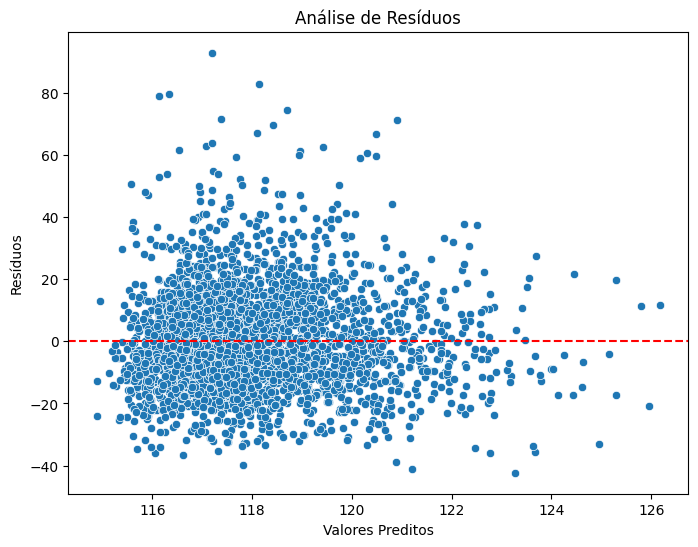

In [7]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
coef = model.coef_[0]

print(f'R²: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'Coeficiente de regressão: {coef:.2f}')

# Validação Cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"R² na Validação Cruzada: {np.mean(cv_scores):.2f}")

# Análise de Resíduos
residuals = y - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Análise de Resíduos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()

### 7. Interpretação


Interpretação:
O R² muito baixo de 0.01, como é muito próximo de 0, indica que o IMC explica muito pouco da variabilidade na PAS, o que sugere que a relação pode não ser estatisticamente significativa.

Primeiras linhas do dataset após adicionar circunferência da cintura:
       SEQN  RIDAGEYR  BMXBMI  BPXOSY1  BMXWAIST
0  130378.0      43.0    27.0    135.0      98.3
1  130380.0      44.0    29.7    111.0      93.5
2  130386.0      34.0    30.2    110.0     106.1
3  130388.0      27.0    43.7    130.0     118.5
4  130389.0      59.0    28.0    145.0      98.7

R²: 0.84
MSE: 50.69
MAE: 5.59
Coeficiente de regressão: 2.15
R² na Validação Cruzada: 0.84


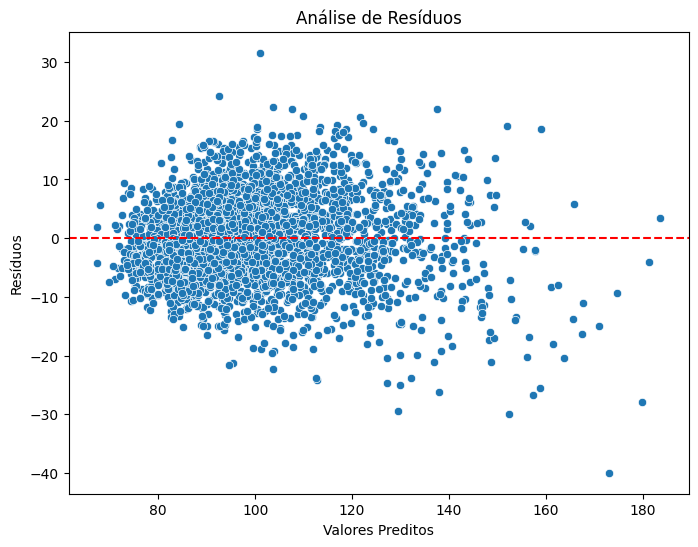


Circunferência da cintura para IMC de 25: 89.07


c:\Users\Laura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
print("\nInterpretação:")
print("O R² muito baixo de 0.01, como é muito próximo de 0, indica que o IMC explica muito pouco da variabilidade na PAS, o que sugere que a relação pode não ser estatisticamente significativa.")

### IMC x circunferência da cintura
data = pd.merge(data, bmi[['SEQN', 'BMXWAIST']], on='SEQN')
data = data.dropna(subset=['BMXWAIST'])

print("\nPrimeiras linhas do dataset após adicionar circunferência da cintura:")
print(data.head())

X = data[['BMXBMI']]
y = data['BMXWAIST']

model2 = LinearRegression()
model2.fit(X, y)

y_pred = model2.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
coef = model2.coef_[0]

print(f'\nR²: {r2:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'Coeficiente de regressão: {coef:.2f}')

# Validação Cruzada
cv_scores = cross_val_score(model2, X, y, cv=5, scoring='r2')
print(f"R² na Validação Cruzada: {np.mean(cv_scores):.2f}")

# Análise de Resíduos
residuals = y - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Análise de Resíduos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()

### Predição
circunf = model2.predict([[25]])
print(f'\nCircunferência da cintura para IMC de 25: {circunf[0]:.2f}')

### 8. Conclusão 

No caso do IMC e a circunferência da cintura, o índice R² é de 0.84, mais próximo de 1, indicando uma forte dependência entre as duas variáveis.